In [2]:
import polars as pl
import numpy as np
import seaborn as sns
import requests as rs
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
from bokeh.plotting import curdoc
from bokeh.models import BasicTickFormatter as bt
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm


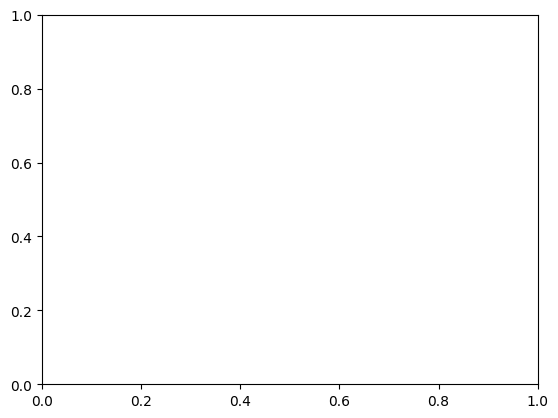

In [3]:
_test1 = plt.axes()

In [4]:
_test2 = plt.figure()

<Figure size 640x480 with 0 Axes>

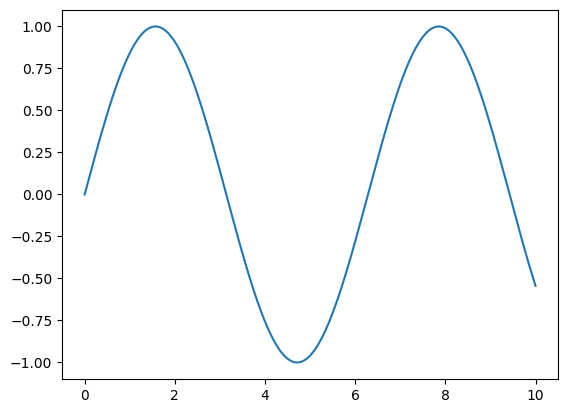

In [5]:
x = np.linspace(0, 10, 100_000)
plt.plot(x, np.sin(x))

(-2.5, 2.5)

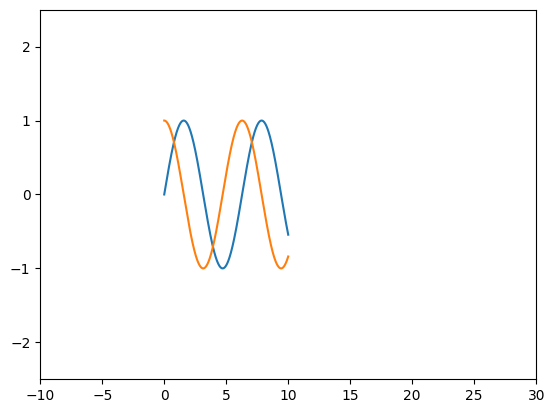

In [6]:
plt.plot(x, np.sin(x));
plt.plot(x, np.cos(x))
plt.xlim(-10, 30)
plt.ylim(-2.5, 2.5)

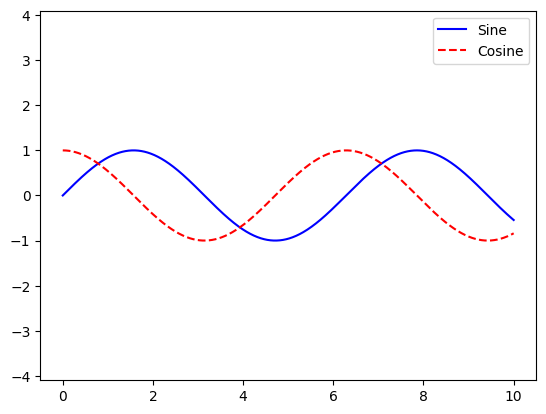

In [7]:
x = np.linspace(0, 10, 1_000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend();

In [8]:
from collections import namedtuple
from IPython.display import display
from scipy.integrate import odeint

In [9]:
odeint?

Signature:
odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `

In [10]:
b = 0.25
c = 5.0

def pend(y, t, b, c):
	theta, omega = y
	dydt = [omega, -b*omega - c*np.sin(theta)]
	return dydt

In [11]:
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

In [12]:
sol = odeint(pend, y0, t, args = (b, c))
sol

array([[ 3.04159265,  0.        ],
       [ 3.03910723, -0.04970768],
       [ 3.03161031, -0.10063956],
       [ 3.01885604, -0.15527321],
       [ 3.00034622, -0.21619767],
       [ 2.97531335, -0.28622816],
       [ 2.94269236, -0.36852039],
       [ 2.9010809 , -0.46668211],
       [ 2.848689  , -0.58487276],
       [ 2.78328015, -0.72787029],
       [ 2.70210903, -0.90106107],
       [ 2.60186732, -1.11027155],
       [ 2.47865984, -1.3612978 ],
       [ 2.32805211, -1.65890275],
       [ 2.14525787, -2.0049587 ],
       [ 1.92556948, -2.39540405],
       [ 1.66515613, -2.81597674],
       [ 1.36231792, -3.23764423],
       [ 1.01910727, -3.61446079],
       [ 0.64286044, -3.88828749],
       [ 0.24676549, -4.00343576],
       [-0.15140491, -3.92725068],
       [-0.53241995, -3.66433553],
       [-0.87932573, -3.25358654],
       [-1.18006013, -2.75037198],
       [-1.42806941, -2.20669539],
       [-1.6213048 , -1.65959566],
       [-1.76055592, -1.12905795],
       [-1.84788973,

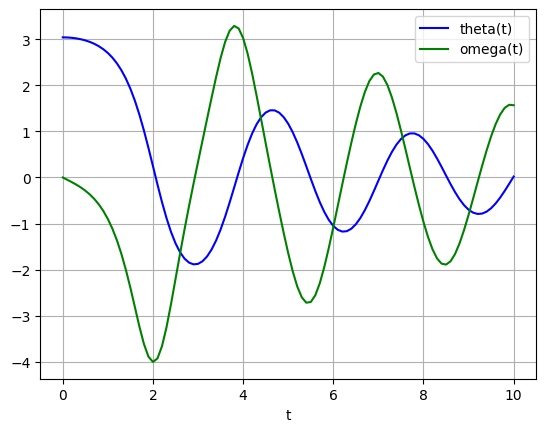

In [14]:
plt.plot(t, sol[:, 0], 'b', label = 'theta(t)')
plt.plot(t, sol[:, 1], 'g', label = 'omega(t)')
plt.legend(loc = 'best')
plt.xlabel('t')
plt.grid(True)
plt.show()

In [16]:
x0 = 10
y0 = 2
alpha = 1
beta = 0.1
delta = 0.075
gamma = 1.5
Coeffs = namedtuple('coeffs', ['alpha', 'beta', 'delta', 'gamma'])
coeffs = Coeffs(alpha = alpha, beta = beta, delta = delta, gamma = gamma)

In [17]:
def dX_dt(X, t, coeffs):
	alpha, beta, delta, gamma = coeffs
	x, y = X
	dx_dt = alpha*x - beta*x*y
	dy_dt = delta*x*y - gamma*y
	return np.array([dx_dt, dy_dt])

In [18]:
X0 = np.array([x0, y0])
t = np.linspace(0, 15, 200)
X = odeint(dX_dt, X0, t, args = (coeffs, ))
x, y = X.T
print(t[:3], x[:3], y[:3])

[0.         0.07537688 0.15075377] [10.         10.62592145 11.29956972] [2.         1.89337696 1.7990321 ]


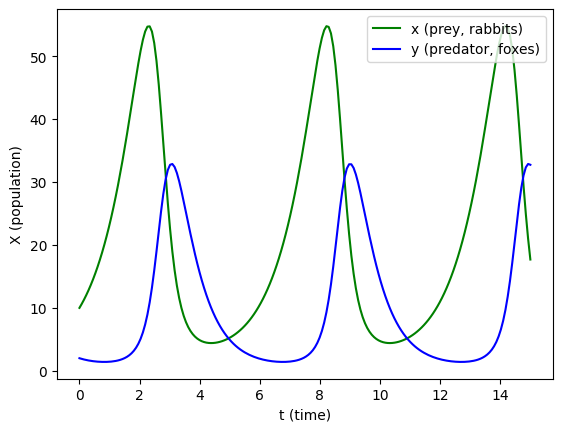

In [19]:
fig, ax = plt.subplots()
ax.plot(t, x, color = 'green', label = 'x (prey, rabbits)')
ax.plot(t, y, color = 'blue', label = 'y (predator, foxes)')
ax.set_xlabel('t (time)')
ax.set_ylabel('X (population)')
ax.legend()

In [31]:
def solve_fox_rabbit(x0 = 10, y0 = 1/2, alpha = 1, beta = 0.1, delta = 0.075, gamma = 1.5):
	coeffs = Coeffs(alpha = alpha, beta = beta, delta = delta, gamma = gamma)

	X0 = np.array([x0, y0])
	t = np.linspace(0, 15, 300)
	X = odeint(dX_dt, X0, t, args=(coeffs, ))
	x, y = X.T
	fig, ax = plt.subplots()
	ax.plot(t, x, color = 'green', label = 'x (prey, rabbits)')
	ax.plot(t, y, color = 'blue', label = 'y (predator, foxes)')
	ax.set_ylim([0, 80])
	ax.set_xlabel('t (time)')
	ax.set_ylabel('X (population)')
	ax.legend()

[]

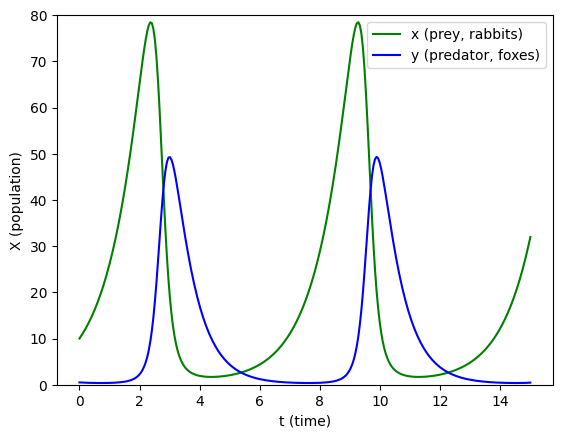

In [32]:
solve_fox_rabbit()
plt.plot()

In [36]:
shop_list = ['milk', 'cheese', 'butter']
mylist = [10, 20, 30, 40, 50, 60, 70, 80]

def searchList(lyst, value):
	for i in lyst:
		if i == value:
			return f"The value is in the {lyst.index(value)}th position."
	return f"The value doesn't exist in the list"

print(searchList(mylist, 50))

The value is in the 4th position.


In [ ]:
from pathlib import Path
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

_wages_local = Path("C:/Users/eorlo/Downloads/Wage.csv")
wages = pl.read_csv(_wages_local)
wages.des
